Database connection successful


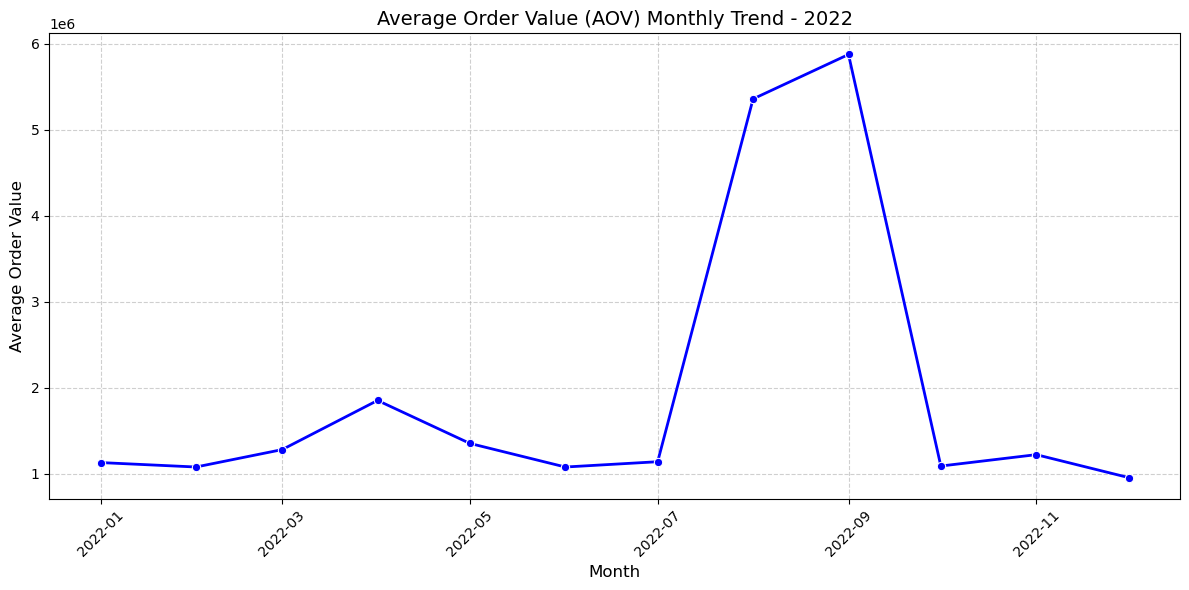

In [18]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'szacbb',  # Replace with your actual password
    'database': 'orderdet',
    'cursorclass': pymysql.cursors.DictCursor
}

try:
    # Connecting to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful")

    # SQL query
    query = """ 
        SELECT 
            DATE_FORMAT(order_date, '%Y-%m') AS month,
            SUM(after_discount) / COUNT(DISTINCT id) AS AOV
        FROM order_detail
        WHERE YEAR(order_date) = 2022
        GROUP BY month
        ORDER BY month;
    """
    with connection.cursor() as cursor:
        cursor.execute(query)
        result = cursor.fetchall()

    # Convert result to DataFrame
    df = pd.DataFrame(result)
    df['month'] = pd.to_datetime(df['month'])

except Exception as e:
    print(f"Error has occurred: {e}")

finally:
    if 'connection' in locals() and connection.open:
        connection.close()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='AOV', marker='o', linewidth=2, color='b')

plt.title("Average Order Value (AOV) Monthly Trend - 2022", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Order Value", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Database connection successful


C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_19588\80411453.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='discount_category', y='total_sales', palette='viridis')


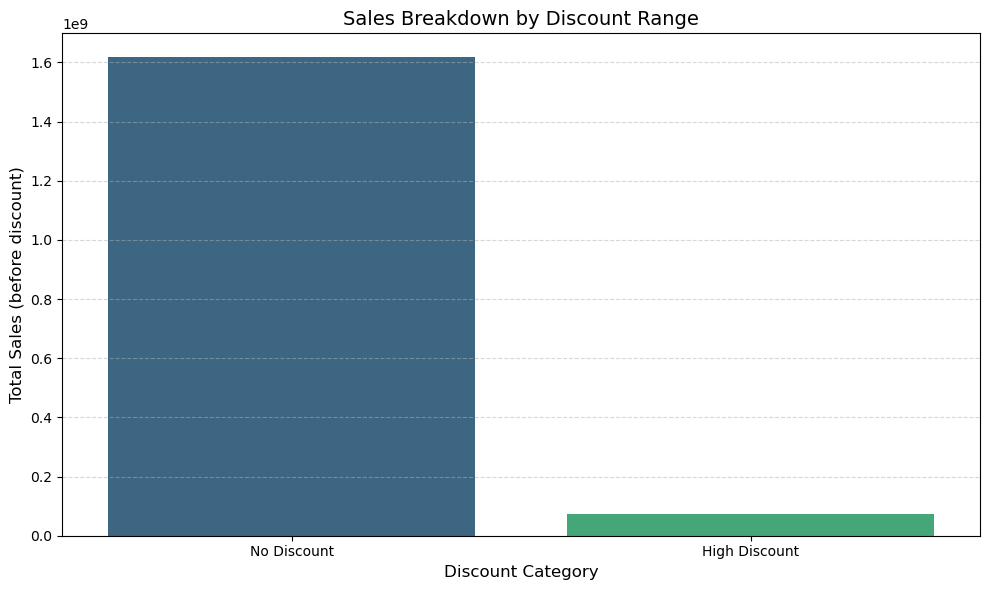

In [22]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database config
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'szacbb',  # your password here
    'database': 'orderdet',
    'cursorclass': pymysql.cursors.DictCursor
}

try:
    # Connect to database
    connection = pymysql.connect(**db_config)
    print("Database connection successful")

    # SQL Query with CASE to segment discount categories
    query = """
        SELECT 
            CASE
                WHEN discount_amount = 0 THEN 'No Discount'
                WHEN discount_amount < 10 THEN 'Low Discount'
                WHEN discount_amount BETWEEN 10 AND 20 THEN 'Medium Discount'
                WHEN discount_amount > 20 THEN 'High Discount'
            END AS discount_category,
            SUM(before_discount) AS total_sales
        FROM order_detail
        WHERE is_valid = 1
        GROUP BY discount_category
        ORDER BY total_sales DESC;
    """

    # Execute and fetch result
    with connection.cursor() as cursor:
        cursor.execute(query)
        result = cursor.fetchall()

    # Convert to DataFrame
    df = pd.DataFrame(result)

except Exception as e:
    print(f"Error occurred: {e}")

finally:
    if 'connection' in locals() and connection.open:
        connection.close()

# --- Plotting ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='discount_category', y='total_sales', palette='viridis')

plt.title("Sales Breakdown by Discount Range", fontsize=14)
plt.xlabel("Discount Category", fontsize=12)
plt.ylabel("Total Sales (before discount)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
